## THU THẬP DỮ LIỆU BẰNG PYTHON

- Họ tên: Đinh Thị Hoàng Linh
- MSSV: 20120130
___

**Nội dung:**

Do bài tập này không yêu cầu cụ thể phải thu thập dữ liệu từ nguồn nào nên người viết sẽ thu thập dữ liệu về trang [Beautiful Death](beautifuldeath.com). Đây là một trang web tổng hợp artwork về các tập phim của series *Game of Thrones* (GoT) của HBO, cụ thể là về cái chết của các nhân vật - thứ vốn là đặc sản, cũng là những khoảnh khắc đáng nhớ nhất của series này.

Người viết sẽ sử dụng API của trang web để thu thập dữ liệu về các artwork trên trang web Beautiful Death, sau đó thực hiện phân tích sơ lược về chúng. 

**Lưu ý:**

Vì lý do cá nhân mà trong notebook này có các đoạn code để tải các artwork về máy cũng như tổ chức chúng trong folder theo từng tập phim, phần này không liên quan tới nội dung bài tập và sẽ có comment thông báo trước các đoạn code thuộc phần này.

In [1]:
# Các thư viện sử dụng cho việc thu thập và phân tích dữ liệu.
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Thư viện để tải artwork về.
import os
import urllib.request

## I. Sơ lược về API sử dụng: 

Các artwork trên Beautiful Death được tổ chức theo từng tập phim, mỗi tập phim sẽ có 1 API riêng, dẫn tới việc phải thu thập dữ liệu từ nhiều API. Phía dưới là 1 trong những API mà người viết sẽ sử dụng, ở đây dùng làm ví dụ:

https://api.tumblr.com/v2/blog/beautifuldeath.com/posts/photo?api_key=HRzSKHAzjRPye8JcCsbykhy3uIp2ri0mtW5Ey5Lktj8At8oNBO&tag=S01E09 

Quay lại chủ đề chính, API này có 2 phần mà chúng ta cần quan tâm:
- api_key: là đoạn mã ngẫu nhiên để truy cập vào dữ liệu của 1 tài khoản nào đó (ở đây là tài khoản Tumblr do Beautiful Death vốn là 1 blog trên Tumblr). Đúng ra thì ta sẽ phải lấy access token của Tumblr (có thể xem hướng dẫn ở [đây](https://mangbinhdinh.vn/thu-thuat/huong-dan-lay-access-token-cua-tumblr.html) nhưng có lẽ vì Beautiful Death được host trên 1 website riêng nên api_key có thể lấy được thẳng từ web luôn, đỡ tốn công, ngại gì không xài :v
- tag: dùng để phân biệt các API, mỗi tag là codename của 1 tập phim có dạng SxxExx, với Sxx tượng trưng cho mùa phim và Exx tượng trưng cho tập phim. Ví dụ trên có tag là 'S01E09', tức là tập thứ 9 của mùa 1. (note: S01E09, đoán xem người viết thích nhân vật nào trong GoT nào :v)

Xem sơ qua API trên:

In [2]:
example = requests.get('https://api.tumblr.com/v2/blog/beautifuldeath.com/posts/photo?api_key=HRzSKHAzjRPye8JcCsbykhy3uIp2ri0mtW5Ey5Lktj8At8oNBO&tag=S01E09')
example.json()

{'meta': {'status': 200, 'msg': 'OK'},
 'response': {'blog': {'ask': False,
   'ask_anon': False,
   'ask_page_title': 'Ask me anything',
   'asks_allow_media': True,
   'avatar': [{'width': 512,
     'height': 512,
     'url': 'https://64.media.tumblr.com/avatar_21a934279722_512.png'},
    {'width': 128,
     'height': 128,
     'url': 'https://64.media.tumblr.com/avatar_21a934279722_128.png'},
    {'width': 96,
     'height': 96,
     'url': 'https://64.media.tumblr.com/avatar_21a934279722_96.png'},
    {'width': 64,
     'height': 64,
     'url': 'https://64.media.tumblr.com/avatar_21a934279722_64.png'}],
   'can_chat': False,
   'can_subscribe': False,
   'description': 'The official episode-by-episode guide to the most iconic deaths in the realm.',
   'is_nsfw': False,
   'likes': 0,
   'name': 'beautifuldeathhbo',
   'posts': 145,
   'share_likes': True,
   'submission_page_title': 'Submit a post',
   'subscribed': False,
   'theme': {'header_full_width': 3600,
    'header_full_h

JSON file trả về gồm 2 key, 'meta' và 'response'. Key 'meta' chứa metadata về API này, còn dữ liệu thì chứa ở 'response'. Đương nhiên chúng ta chỉ quan tâm tới key 'response'.

In [3]:
example.json()['response']

{'blog': {'ask': False,
  'ask_anon': False,
  'ask_page_title': 'Ask me anything',
  'asks_allow_media': True,
  'avatar': [{'width': 512,
    'height': 512,
    'url': 'https://64.media.tumblr.com/avatar_21a934279722_512.png'},
   {'width': 128,
    'height': 128,
    'url': 'https://64.media.tumblr.com/avatar_21a934279722_128.png'},
   {'width': 96,
    'height': 96,
    'url': 'https://64.media.tumblr.com/avatar_21a934279722_96.png'},
   {'width': 64,
    'height': 64,
    'url': 'https://64.media.tumblr.com/avatar_21a934279722_64.png'}],
  'can_chat': False,
  'can_subscribe': False,
  'description': 'The official episode-by-episode guide to the most iconic deaths in the realm.',
  'is_nsfw': False,
  'likes': 0,
  'name': 'beautifuldeathhbo',
  'posts': 145,
  'share_likes': True,
  'submission_page_title': 'Submit a post',
  'subscribed': False,
  'theme': {'header_full_width': 3600,
   'header_full_height': 5400,
   'header_focus_width': 2048,
   'header_focus_height': 1153,
  

In [4]:
example.json()['response'].keys()

dict_keys(['blog', 'posts', 'total_posts'])

Ở key 'response' lại gồm 3 key nữa, trong đó 'blog' chứa thông tin về blog Beautiful Death, 'posts' chứa 1 list, mỗi phần tử trong list chứa thông tin về các post artwork trong API này và 'total_posts' chứa thông tin tổng số post trong API này. Vì chúng ta chỉ quan tâm tới artwork nên sẽ đi sâu vào key 'posts' và bỏ qua 2 key còn lại.

In [5]:
example.json()['response']['posts'][0]

{'type': 'photo',
 'blog_name': 'beautifuldeathhbo',
 'blog': {'name': 'beautifuldeathhbo',
  'title': 'Beautiful Death',
  'description': 'The official episode-by-episode guide to the most iconic deaths in the realm.',
  'url': 'https://beautifuldeath.com/',
  'uuid': 't:UKC84vs62nacCBVPzcROyA',
  'updated': 1560440996,
  'tumblrmart_accessories': {}},
 'id': 81517000290,
 'id_string': '81517000290',
 'post_url': 'https://beautifuldeath.com/post/81517000290/winter-is-coming',
 'slug': 'winter-is-coming',
 'date': '2014-04-02 20:46:45 GMT',
 'timestamp': 1396471605,
 'state': 'published',
 'format': 'html',
 'reblog_key': 'qX6CphC2',
 'tags': ['S01E09',
  'submission',
  'Fan',
  'beautifuldeath',
  'game of thrones',
  'Ned Stark'],
 'short_url': 'https://tmblr.co/ZvykEo1BwohPY',
 'summary': 'WINTER IS COMING',
 'should_open_in_legacy': True,
 'recommended_source': None,
 'recommended_color': None,
 'is_anonymous': True,
 'is_submission': True,
 'note_count': 429,
 'caption': '<p>WINT

Có hơi quá nhiều trường thông tin ở đây nên để dễ đọc, chúng ta chỉ lấy về một vài trường thông tin quan trọng. Các trường thông tin được lấy về bao gồm:
- post_url: đường link tới post artwork.
- date: ngày đăng post.
- tags: các tag được gắn trong post.
- summary: tiêu đề của artwork (nếu có).
- note_count: số lượt tương tác.
- original_size: chứa đường link tới artwork gốc và kích thước của nó, ở đây chỉ lấy đường link để tải ảnh về nếu muốn. Trường alt_size cũng có cấu trúc tương tự nhưng do original_size thường là size lớn nhất nên người viết lấy link ở đây để ảnh đẹp hơn.

Thông tin bên lề đã xong, giờ đến phần code chính ở dưới :v

In [6]:
season_episode = [] # Mảng chứa các tag sử dụng để lấy API.
season = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08'] # GoT có 8 mùa phim,...
episode = ['E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10'] # ...mỗi mùa phim thường bao gồm 10 tập.

# Ghép các phần tử trong season và episode để tạo thành tag.
for item1 in range(0,6):
      for item2 in episode:
              season_episode.append(season[item1] + item2) 
for item in range(0,7):
      season_episode.append(season[6] + episode[item]) # Mùa 7 chỉ có 7 tập phim.
for item in range(0,6):
      season_episode.append(season[7] + episode[item]) # Mùa 8 chỉ có 6 tập phim.

# Tạo dataframe tóm tắt thông tin về các artwork.
info = pd.DataFrame(columns = ['Episode', 'Post URL', 'Date of Submission', 'Tags', 'Summary', 'Number of Notes', 'Image URL'])
post_url = []
date = []
tags = []
summary = []
note_count = []
image_url = []
episode_code = []

# Tạo folder chứa artwork.
if (os.path.exists('C:/Beautiful_Death') == False):
    os.mkdir('C:/Beautiful_Death')
    

for se in season_episode:
    response = requests.get('https://api.tumblr.com/v2/blog/beautifuldeath.com/posts/'
                            + 'photo?api_key=HRzSKHAzjRPye8JcCsbykhy3uIp2ri0mtW5Ey5Lktj8At8oNBO&tag=' + se)
    
    # Tổ chức folder theo từng tập phim.
    path = 'C:/Beautiful_Death/' + se
    if (os.path.exists(path) == False):
        os.mkdir(path)
    os.chdir(path)
    
    # Lấy thông tin về từng artwork để điền vào dataframe info.
    for item in response.json()['response']['posts']:
            episode_code.append(se)
            post_url.append(item['post_url'])
            date.append(item['date'])
            tags.append(item['tags'])
            summary.append(item['summary'])
            note_count.append(item['note_count']) 
            image_url.append(item['photos'][0]['original_size']['url'])
            
            # Tải từng artwork về.
            file_name = (item['photos'][0]['original_size']['url']).split('/')[-1] + '.jpg'
            if (os.path.exists(path + '/' + file_name) == False):
                urllib.request.urlretrieve(item['photos'][0]['original_size']['url'], file_name)
                
# Điền vào dataframe info.
info['Episode'] = episode_code
info['Post URL'] = post_url
info['Date of Submission'] = date
info['Tags'] = tags
info['Summary'] = summary
info['Number of Notes'] = note_count
info['Image URL'] = image_url

In [7]:
info.head()

,Episode,Post URL,Date of Submission,Tags,Summary,Number of Notes,Image URL
0,S01E01,https://beautifuldeath.com/post/81612444506,2014-04-03 20:28:49 GMT,"[S01E01, submission, Fan, Game of Thrones, Ned...",,212,https://64.media.tumblr.com/a0204dbac31d4677ea...
1,S01E01,https://beautifuldeath.com/post/81516945248/wi...,2014-04-02 20:46:10 GMT,"[S01E01, submission, Fan, game of thrones, bea...","Winter Is Coming, by Richard Dowdican",126,https://64.media.tumblr.com/a256074ad70eb01691...
2,S01E01,https://beautifuldeath.com/post/79874604407,2014-03-17 15:53:00 GMT,"[S01E01, submission, gameofthrones, game of th...",,191,https://64.media.tumblr.com/1314b26360c0fd645d...
3,S01E01,https://beautifuldeath.com/post/79177509568,2014-03-10 17:39:00 GMT,"[S01E01, submission, whitewalker, WinterIsComi...",,429,https://64.media.tumblr.com/158cc5fbcc6e49725c...
4,S01E01,https://beautifuldeath.com/post/78865436935/se...,2014-03-07 18:45:00 GMT,"[S01E01, submission, gameofthrones, beautifuld...",Ser Waymer Royce by Nicholas Ballesteros,153,https://64.media.tumblr.com/41ae01366846c8e6aa...


## II. Phân tích dữ liệu

Trước hết chúng ta sẽ xem các artwork được đăng lên vào thời gian nào cũng như sự phân bố về thời gian đăng lên.

Text(0.5, 1.0, 'Số lượng artwork theo năm')

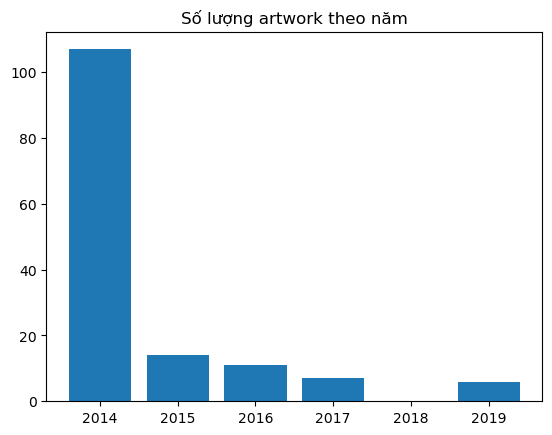

In [8]:
info['Date of Submission'] = pd.to_datetime(info['Date of Submission'])
year = info['Date of Submission'].apply(lambda date: date.year)
plt.bar(dict(year.value_counts()).keys(),dict(year.value_counts()).values())
plt.title('Số lượng artwork theo năm')

Phần lớn artwork đều được đăng tải vào năm 2014, cũng là năm đầu tiên blog Beautiful Death hoạt động. Về sau artwork đăng lên càng ngày càng ít, chủ yếu chỉ có artwork chính thức của phía HBO (có lẽ do có quá nhiều nền tảng để đăng tải artwork về GoT khi độ nổi tiếng của series này bùng nổ?). Riêng năm 2018 thì không có artwork do không có phim (mùa 7 công chiếu vào 2017, sau đó nghỉ 1 năm rồi mới công chiếu mùa 8 vào năm 2019).

Tiếp theo chúng ta sẽ xem thử top 15 tập phim có nhiều artwork nhất...

In [10]:
artwork_count_by_episode = info.groupby(by = ['Episode']).count()
artwork_count_by_episode.sort_values('Post URL', ascending = False).head(15)

,Post URL,Date of Submission,Tags,Summary,Number of Notes,Image URL
Episode,,,,,,
S03E09,10,10,10,10,10,10
S02E10,9,9,9,9,9,9
S01E06,8,8,8,8,8,8
S01E01,6,6,6,6,6,6
S03E04,6,6,6,6,6,6
S01E09,5,5,5,5,5,5
S02E05,4,4,4,4,4,4
S04E02,4,4,4,4,4,4
S03E08,4,4,4,4,4,4


... và top 10 artwork có nhiều lượt note lại nhất (note trong Tumblr có thể hiểu như like + share + reply cùa Facebook):

In [11]:
info.sort_values('Number of Notes', ascending = False).head(10)

,Episode,Post URL,Date of Submission,Tags,Summary,Number of Notes,Image URL
22,S01E06,https://beautifuldeath.com/post/79366400307/vi...,2014-03-12 16:04:00+00:00,"[S01E06, HBO, beautifuldeath, gameofthrones]",View the full #BeautifulDeath episodic countdo...,18174,https://64.media.tumblr.com/e7f3d9fcba22881332...
89,S03E09,https://beautifuldeath.com/post/81686589470,2014-04-04 16:04:15+00:00,"[S03E09, HBO, beautifuldeath, gameofthrones]",,7865,https://64.media.tumblr.com/37dfbfe2d9ed8f40a8...
130,S06E09,https://beautifuldeath.com/post/146414027173,2016-06-24 17:57:17+00:00,"[S06E09, HBO, beautifuldeath, gameofthrones]",,5789,https://64.media.tumblr.com/5883a24c29459fe044...
119,S05E08,https://beautifuldeath.com/post/120782210733,2015-06-05 16:02:40+00:00,"[S05E08, HBO, beautifuldeath, gameofthrones]",,5251,https://64.media.tumblr.com/0e0f2afe788b3374be...
105,S04E07,https://beautifuldeath.com/post/86604107535,2014-05-23 16:04:18+00:00,"[S04E07, HBO, beautifuldeath, gameofthrones]",,4763,https://64.media.tumblr.com/3df976c905f44ce358...
131,S06E10,https://beautifuldeath.com/post/146764574078,2016-07-01 19:33:48+00:00,"[S06E10, HBO, beautifuldeath, gameofthrones]",,4155,https://64.media.tumblr.com/e2cc43d78eb11b17e2...
99,S04E02,https://beautifuldeath.com/post/83106224611,2014-04-18 16:04:18+00:00,"[S04E02, HBO, beautifuldeath, gameofthrones]",,4131,https://64.media.tumblr.com/dba1c1789807ac77a3...
33,S01E10,https://beautifuldeath.com/post/79768782440,2014-03-16 16:04:15+00:00,"[S01E10, HBO, beautifuldeath, gameofthrones]",,3648,https://64.media.tumblr.com/5c77f113038d95a3d9...
102,S04E04,https://beautifuldeath.com/post/84527567602,2014-05-02 16:04:00+00:00,"[S04E04, HBO, beautifuldeath, gameofthrones]",,3352,https://64.media.tumblr.com/5c065625c636694f96...
31,S01E09,https://beautifuldeath.com/post/79661933049,2014-03-15 16:04:52+00:00,"[S01E09, HBO, beautifuldeath, gameofthrones]",,3102,https://64.media.tumblr.com/44ac8bbf48f3efe938...


Phần lớn những khoảnh khắc đáng nhớ của GoT đều xuất hiện ở đây. Nhưng bất ngờ nhất là artwork của S01E06 lại đứng đầu về số lượt tương tác (và gấp đôi vị trí thứ 2?). Không rõ vì sao lại có sự khác biệt này khi mà nhân vật được tả trong artwork vốn không có vai trò quá lớn trong phim và cái chết của anh này cũng không có ảnh hưởng gì nhiều. S04E04 và S04E07 cũng có lượt tương tác cao bất thường tương tự, có thể là do artwork của các tập này đẹp?

![Viserys Targaryen](https://64.media.tumblr.com/e7f3d9fcba228813320bd1a8913fa5f3/tumblr_n2bw29tsTd1tuzdqso1_1280.jpg)

<center>S01E06</center>

![Lysa Tully](https://64.media.tumblr.com/3df976c905f44ce3589aef2b7776b9a6/tumblr_n5zt02gH9z1tuzdqso1_1280.jpg)

<center>S04E07</center>

![Slavers](https://64.media.tumblr.com/5c065625c636694f96d5ea1e95069784/tumblr_n4wp3uQftB1tuzdqso1_r3_1280.jpg)

<center>S04E04</center>